In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
%matplotlib inline

In [2]:
# Example settings
n_samples = 500
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Note that 0 label means inlier and 1 label means outlier
labels = np.append(np.zeros(n_inliers), np.ones(n_outliers)).astype(int)

In [3]:
# Generate 5 datasets(85% inlier, 15% outlier)

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_inliers, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_inliers, 2) - 0.5)]

colors = np.array(['#377eb8', '#ff7f00'])

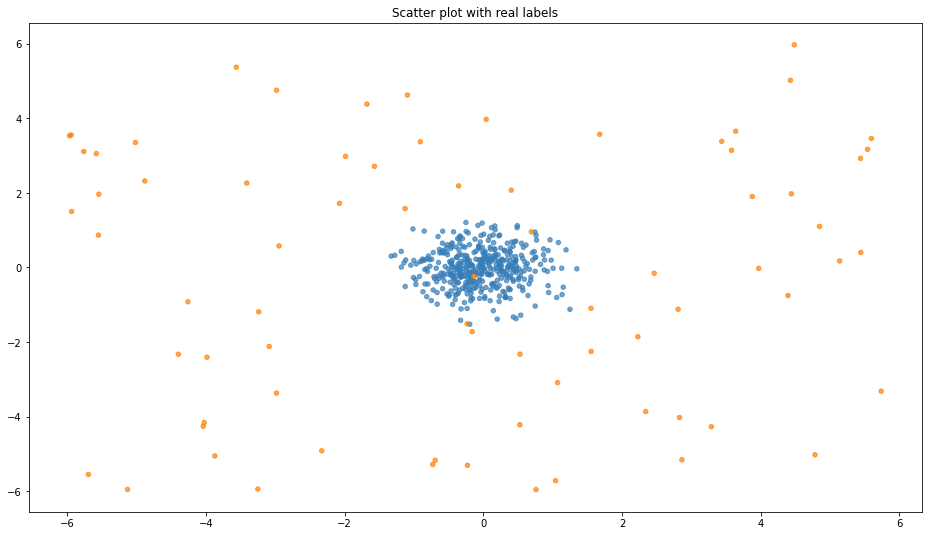

In [4]:
X = np.concatenate([datasets[0], np.random.uniform(low=-6, high=6,
                   size=(n_outliers, 2))], axis=0)

plt.figure(figsize=(16,9))
plt.title("Scatter plot with real labels")
plt.scatter(X[:,0], X[:, 1], color=colors[labels], s = 20, alpha=0.7)


In [5]:
# Fit the data X to anomaly detection method

mcd = EllipticEnvelope(support_fraction = 0.9, contamination=outliers_fraction)
y_pred = mcd.fit(X).predict(X)

In [6]:
mcd.location_

mcd.covariance_

array([[0.23552101, 0.0077689 ],
       [0.0077689 , 0.25315619]])

/Users/minjunggim/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


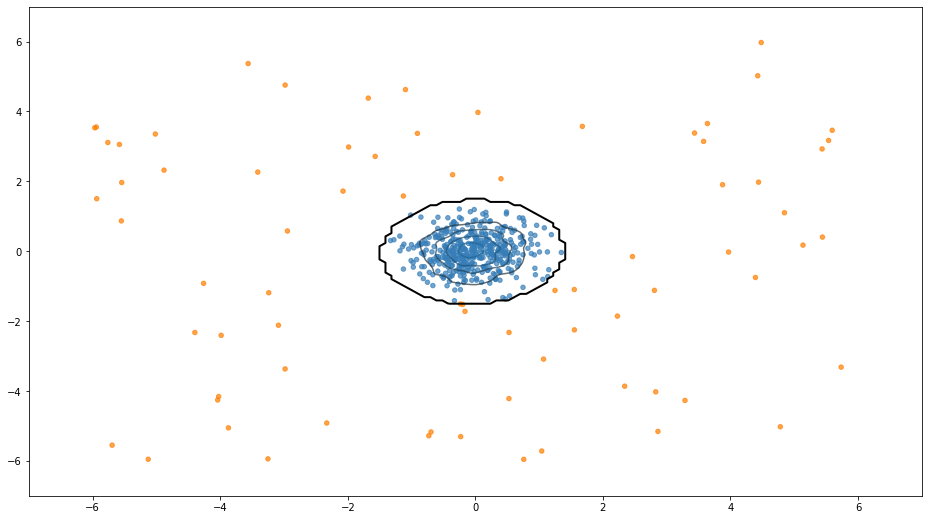

In [7]:
plt.figure(figsize=(16,9))

# Generate multivariate normal distribution with mcd location and covariance
gen_data = np.random.multivariate_normal(mcd.location_, mcd.covariance_, 5_000)
sns.kdeplot(data=gen_data, levels=5, alpha=0.7)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[- (y_pred - 1) // 2], alpha=0.7)
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))
Z = mcd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')